Normalized SSD of im01 with its Nearest Neighbour Zoomed Picture is:  408.80685185185183
Normalized SSD of im01 with its Bilinear Zoomed Picture is:  408.80685185185183
Normalized SSD of im02 with its Nearest Neighbour Zoomed Picture is:  79.3381875
Normalized SSD of im02 with its Bilinear Zoomed Picture is:  79.3381875
Normalized SSD of im03 with its Nearest Neighbour Zoomed Picture is:  222.45101369863013
Normalized SSD of im03 with its Bilinear Zoomed Picture is:  222.45101369863013
Normalized SSD of im04 with its Nearest Neighbour Zoomed Picture is:  714.0845714285714
Normalized SSD of im04 with its Bilinear Zoomed Picture is:  714.0845714285714


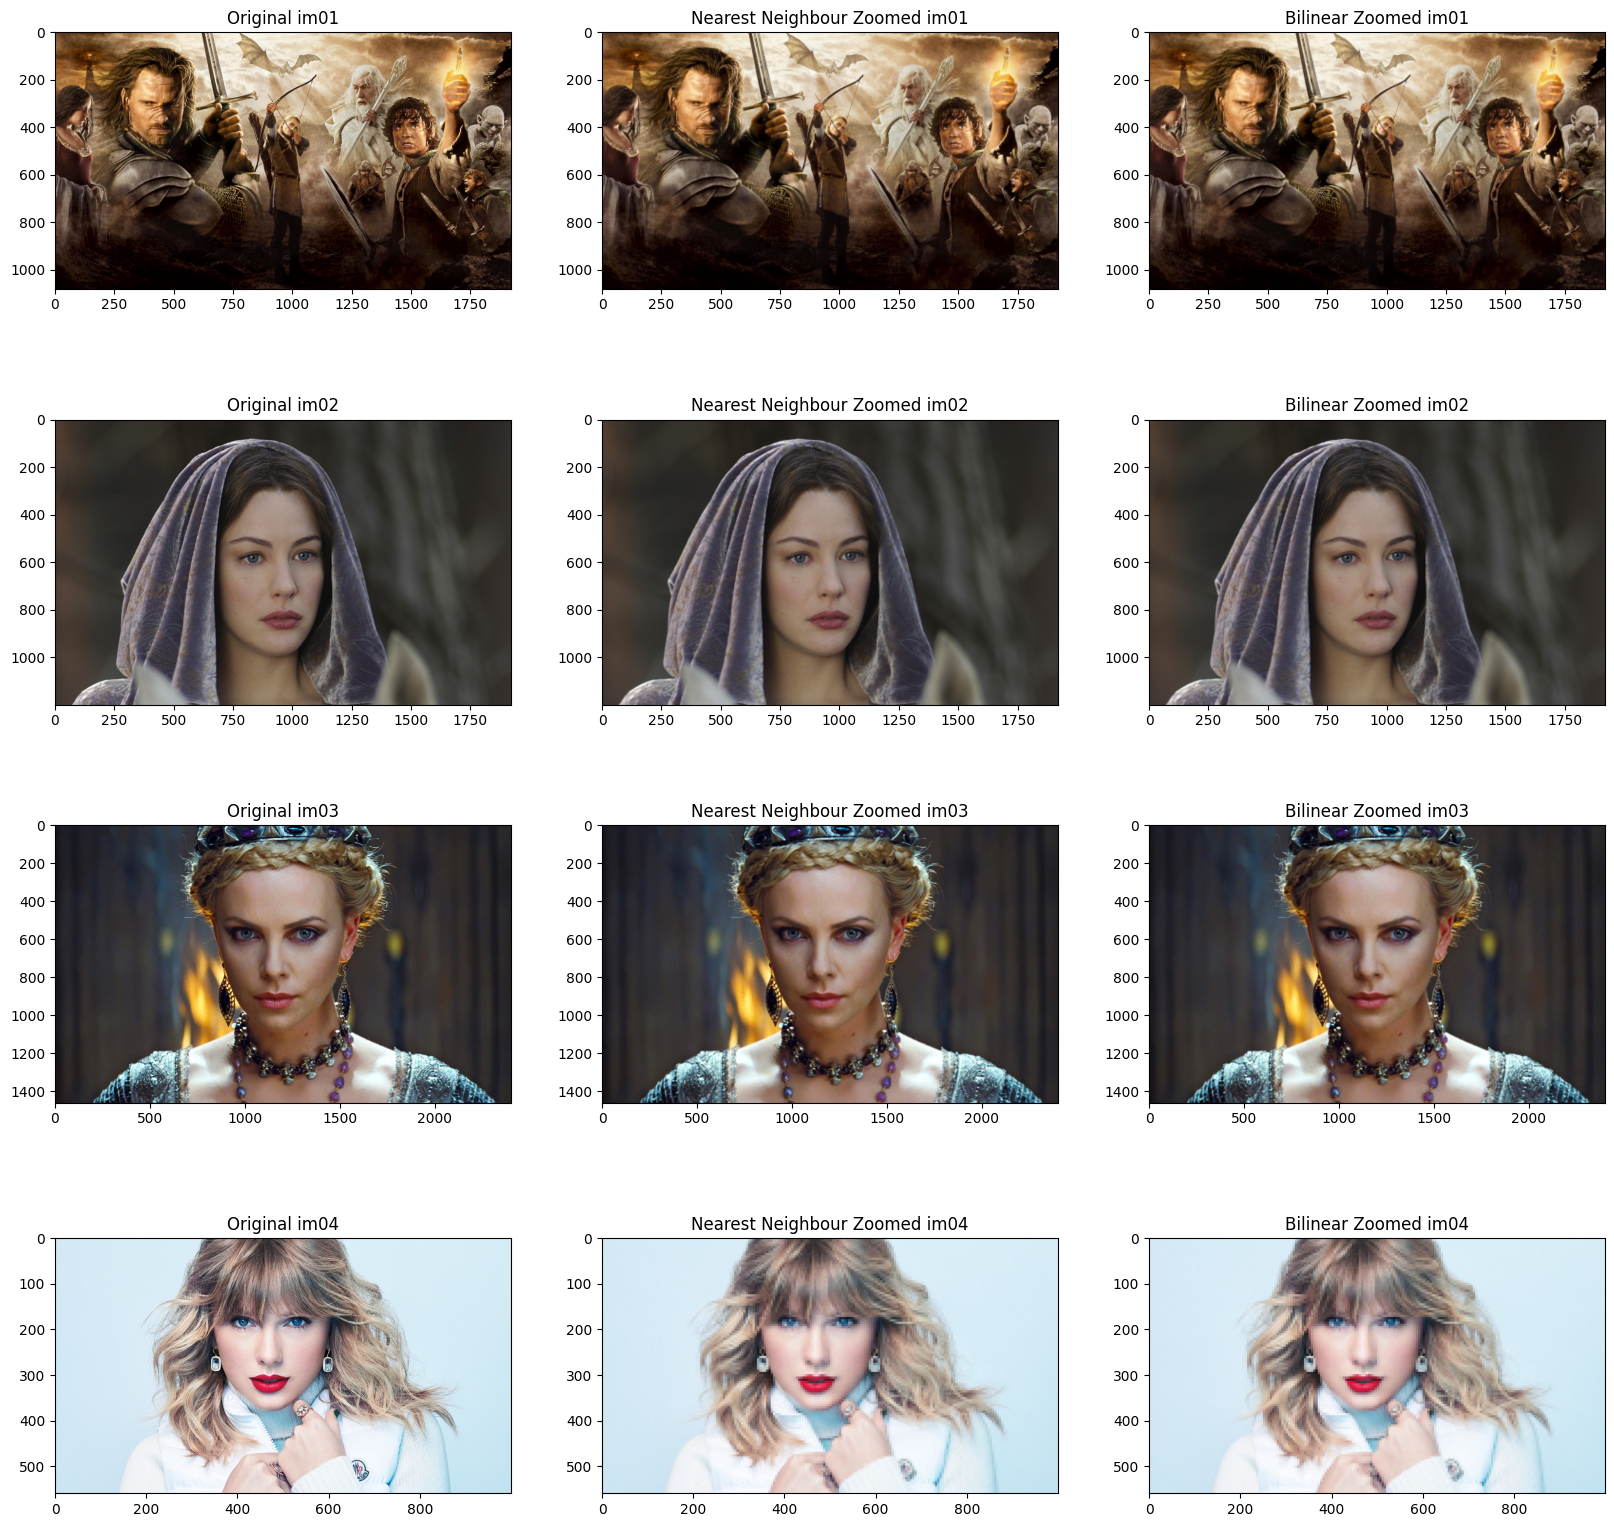

In [38]:
#Question 7 - Zoomed imgs

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reads the images into a dictionary
d = {}
for x in range(1, 4):
    d["im{0}".format(x)] = cv.imread('images/a1q7images/im0{0}.png'.format(x))
    assert d["im{0}".format(x)] is not None
    d["im{0}small".format(x)] = cv.imread('images/a1q7images/im0{0}small.png'.format(x))
    assert d["im{0}small".format(x)] is not None
    d["im{0}".format(x)] = cv.cvtColor(d["im{0}".format(x)], cv.COLOR_BGR2RGB)
    d["im{0}small".format(x)] = cv.cvtColor(d["im{0}small".format(x)], cv.COLOR_BGR2RGB)

#Colour correcting the images
d["im4"] = cv.imread('images/a1q7images/im04.jpg')
d["im4small"] = cv.imread('images/a1q7images/im04small.jpg')
d["im4"] = cv.cvtColor(d["im4"], cv.COLOR_BGR2RGB)
d["im4small"] = cv.cvtColor(d["im4small"], cv.COLOR_BGR2RGB)

#Part (a) - Nearest Neighbour Interpolation
def zoom_near (img, factor):
    h,w = img.shape[:2]
    new_h = int(h*factor)
    new_w = int(w*factor)


    zoomed = np.zeros((new_h, new_w, img.shape[2]), dtype=np.uint8)
    scale_row = h / new_h
    scale_col = w / new_w
    for i in range(new_h):
        for j in range(new_w):
            og_i = int(i * scale_row)
            og_j = int(j * scale_col)
            zoomed[i, j] = img[og_i, og_j]

    return zoomed


#Part (b) - Bilinear Interpolation
def zoom_bilinear (img, factor):
    h,w = img.shape[:2]
    new_h = int(h*factor)
    new_w = int(w*factor)
    zoomed = np.zeros((new_h, new_w, img.shape[2]), dtype=np.uint8)
    scale_row = h / new_h
    scale_col = w / new_w
    for i in range(new_h):
        for j in range(new_w):
            og_i = int(i * scale_row)
            og_j = int(j * scale_col)
            top_left = img[int(og_i), int(og_j)]
            top_right = img[int(og_i), min(int(og_j) + 1, w - 1)]
            bottom_left = img[min(int(og_i) + 1, h - 1), int(og_j)]
            bottom_right = img[min(int(og_i) + 1, h - 1), min(int(og_j) + 1, w - 1)]
            dx = og_j - int(og_j)
            dy = og_i - int(og_i)
            interpolated_value = (1 - dx) * (1 - dy) * top_left + dx * (1 - dy) * top_right + \
                                 (1 - dx) * dy * bottom_left + dx * dy * bottom_right
            zoomed[i, j] = interpolated_value.astype(np.uint8)

    return zoomed


def normalized_ssd(img1, img2):

    if img1.shape != img2.shape:
        raise ValueError("Images must have the same shape.")
    ssd = np.sum((img1.astype(np.float32) - img2.astype(np.float32))**2)
    normalized_ssd = ssd / (img1.shape[0] * img1.shape[1])
    return normalized_ssd, ssd

#Zooms the images
for x in range(1, 4):
    d["im{0}zoom_n".format(x)] = zoom_near(d["im{0}small".format(x)], 4)
    d["im{0}zoom_b".format(x)] = zoom_bilinear(d["im{0}small".format(x)], 4)

d["im4zoom_n"] = zoom_near(d["im4small"], 5)
d["im4zoom_b"] = zoom_bilinear(d["im4small"], 5)

#Computes the NSSD

for x in range(1,5):
    nssd_n, ssd_n = normalized_ssd(d["im{0}".format(x)], d["im{0}zoom_n".format(x)])
    nssd_b, ssd_b = normalized_ssd(d["im{0}".format(x)], d["im{0}zoom_b".format(x)])
    print("SSD of im0{0} with its Nearest Neighbour Zoomed Picture is: ".format(x), ssd_n)
    print("SSD of im0{0} with its Bilinear Zoomed Picture is: ".format(x), ssd_b)
    print("Normalized SSD of im0{0} with its Nearest Neighbour Zoomed Picture is: ".format(x), nssd_n)
    print("Normalized SSD of im0{0} with its Bilinear Zoomed Picture is: ".format(x), nssd_b)



fig, ax = plt.subplots(4,3, figsize = (20,20))
ax[0 , 0].imshow(d["im1"])
ax[0 , 0].set_title('Original im01')
ax[0 , 1].imshow(d["im1zoom_n"])
ax[0 , 1].set_title('Nearest Neighbour Zoomed im01')
ax[0 , 2].imshow(d["im1zoom_b"])
ax[0 , 2].set_title('Bilinear Zoomed im01')
ax[1 , 0].imshow(d["im2"])
ax[1 , 0].set_title('Original im02')
ax[1 , 1].imshow(d["im2zoom_n"])
ax[1 , 1].set_title('Nearest Neighbour Zoomed im02')
ax[1 , 2].imshow(d["im2zoom_b"])
ax[1 , 2].set_title('Bilinear Zoomed im02')
ax[2 , 0].imshow(d["im3"])
ax[2 , 0].set_title('Original im03')
ax[2 , 1].imshow(d["im3zoom_n"])
ax[2 , 1].set_title('Nearest Neighbour Zoomed im03')
ax[2 , 2].imshow(d["im3zoom_b"])
ax[2 , 2].set_title('Bilinear Zoomed im03')
ax[3 , 0].imshow(d["im4"])
ax[3 , 0].set_title('Original im04')
ax[3 , 1].imshow(d["im4zoom_n"])
ax[3 , 1].set_title('Nearest Neighbour Zoomed im04')
ax[3 , 2].imshow(d["im4zoom_b"])
ax[3 , 2].set_title('Bilinear Zoomed im04')
fig.suptitle('')
plt.show()

cv.imshow("lotr", d["im1"])
cv.waitKey(0)
cv.imshow("lotr nn zoom", d["im1zoom_n"])
cv.waitKey(0)
cv.imshow("lotr b zoom",d["im1zoom_b"])
cv.waitKey(0)
cv.destroyAllWindows()